*** Kokab Kajbaf Zadeh ***

MUN student number :  202190560

In this project I am going to analysis a dataset.
About Dataset:
The Sustainable Development Report 2023 dataset includes thorough information about sustainability and advancements
made in relation to the Sustainable Development Goals (SDGs) for a number of nations.
The dataset's entries each include statistics on a country's sustainability rankings,
regional placement, and SDG performance. This dataset offers insightful information about
international sustainability initiatives and enables a nuanced evaluation of nations' development
towards sustainability.


Dataset:
 The dataset includes the following columns:
 - country_code (A unique identifier that links to the primary dataset),
 - country (The name of the country.), year (The year of the data entry.),
 - sdg_index_score (The overall SDG (Sustainable Development Goals) index score of the country.),
 - goal_1_score (No Poverty.),
 - goal_2_score (Zero Hunger),
 - goal_3_score (Good Health and Wellbeing),
 - goal_4_score (Quality Education),
 - goal_5_score (Gender Equality),
 - goal_6_score (Clean Water and Sanitation),
 - goal_7_score (Affordable and Clean Energy.),
 - goal_8_score (Decent Work and Economic Growth.),
 - goal_9_score (Industry, Innovation and Infrastructure.),
 - goal_10_score (Reduced Inequalities.),
 - goal_11_score (Sustainable Cities and Communities.),
 - goal_12_score (Responsible Consumption and Production.),
 - goal_13_score( Climate Action.),
 - goal_14_score (Life Below Water.),
 - goal_15_score (Life on Land.),
 - goal_16_score (Peace, Justice and Strong Institutions.),
 - goal_17_score (Partnerships for the Goals.).

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Goal: goal_1_score
Number of Countries Below Quantile: 21

Goal: goal_2_score
Number of Countries Below Quantile: 32

Goal: goal_3_score
Number of Countries Below Quantile: 40

Goal: goal_4_score
Number of Countries Below Quantile: 31

Goal: goal_5_score
Number of Countries Below Quantile: 35

Goal: goal_6_score
Number of Countries Below Quantile: 31

Goal: goal_7_score
Number of Countries Below Quantile: 31

Goal: goal_8_score
Number of Countries Below Quantile: 22

Goal: goal_9_score
Number of Countries Below Quantile: 27

Goal: goal_10_score
Number of Countries Below Quantile: 0

Goal: goal_11_score
Number of Countries Below Quantile: 29

Goal: goal_12_score
Number of Countries Below Quantile: 25

Goal: goal_13_score
Number of Countries Below Quantile: 23

Goal: goal_14_score
Number of Countries Below Quantile: 0

Goal: goal_15_score
Number of Countries Below Quantile: 30

Goal: goal_16_score
Number of Countries Below Quantile: 30

Goal: goal_17_score
Number of Countries Below Quant

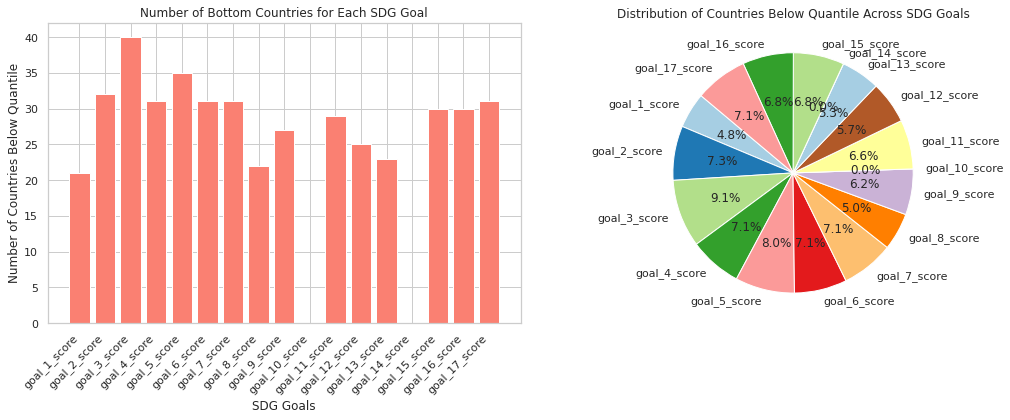

In [106]:
"""
this code reads dataset, 
calculates quantiles for each goal, counts the number of countries below the quantile for each goal,
prints the results, and then visualizes the information using bar and pie charts.
"""
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sdg_index.csv',index_col="year")

# Select only the columns containing goal scores
goal_columns = df.columns[3:]

# The quantile threshold
quantile_threshold = 0.1

# List to store the number of countries below the quantile for each goal
countries_below_quantile_count = []

# Iterate through each goal score column
for goal in goal_columns:
    # Calculate the quantile value for the current goal
    quantile_value = df[goal].quantile(quantile_threshold)
    
    # Count the number of countries below the quantile for the current goal
    num_countries_below_quantile = df[df[goal] < quantile_value]['country'].nunique()
    
    # Append the results to the list
    countries_below_quantile_count.append({'Goal': goal, 'Num_Countries_Below_Quantile': num_countries_below_quantile})

# DataFrame from the list of dictionaries
below_quantile_count_df = pd.DataFrame(countries_below_quantile_count)

# Print the results row by row
for index, row in below_quantile_count_df.iterrows():
    print(f"Goal: {row['Goal']}\nNumber of Countries Below Quantile: {row['Num_Countries_Below_Quantile']}\n{'='*50}\n")

# Bar chart for the number of countries below the quantile for each goal
plt.figure(figsize=(15, 6))

# Bar graph
plt.subplot(1, 2, 1)
plt.bar(below_quantile_count_df['Goal'], below_quantile_count_df['Num_Countries_Below_Quantile'], color='salmon')
plt.xlabel('SDG Goals')
plt.ylabel('Number of Countries Below Quantile')
plt.title('Number of Bottom Countries for Each SDG Goal')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 45, 5)) 

# Pie chart for the overall distribution
plt.subplot(1, 2, 2)
plt.pie(below_quantile_count_df['Num_Countries_Below_Quantile'], labels=below_quantile_count_df['Goal'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Countries Below Quantile Across SDG Goals')

plt.tight_layout()
plt.savefig('CombinedCharts.pdf', bbox_inches='tight')
plt.show()

In [107]:
"""
This code offers a comprehensive analysis of countries that have scores below
the designated quantile for each objective.
It provides more detailed insights into the score distribution
for individual Sustainable Development Goals.
"""
import pandas as pd


# 10th quantile
quantile_value = 0.1

# List to store dictionaries of countries with goal scores below the specified quantile for each goal
countries_below_quantile = []

# Iterate through each goal score column
for goal in goal_columns:
    quantile_threshold = df[goal].quantile(quantile_value)
    countries_below_quantile_goal = df[df[goal] < quantile_threshold]['country'].unique()
    countries_below_quantile.append({goal: countries_below_quantile_goal})

# Display the countries with goal scores below the specified quantile for each goal
for result in countries_below_quantile:
    goal, countries = list(result.items())[0]
    print(f"\nCountries with {goal} below {quantile_value*100}th quantile:")
    print(', '.join(countries))
    print('='*50)


Countries with goal_1_score below 10.0th quantile:
Bahamas, The, Bahrain, Barbados, Brunei Darussalam, Burundi, Cambodia, Central African Republic, Congo, Dem. Rep., Cuba, Iraq, Kuwait, Malawi, Mozambique, New Zealand, Oman, Qatar, Singapore, South Sudan, Suriname, Syrian Arab Republic, Ukraine

Countries with goal_2_score below 10.0th quantile:
Afghanistan, Albania, Bhutan, Botswana, Cabo Verde, Central African Republic, Chad, Comoros, Djibouti, Ethiopia, Guatemala, Iraq, Lao PDR, Liberia, Low-income Countries, Madagascar, Maldives, Mauritania, Mongolia, Namibia, Niger, Oceania, Pakistan, Panama, Papua New Guinea, Somalia, South Sudan, Sudan, Syrian Arab Republic, Tajikistan, Yemen, Rep., Zimbabwe

Countries with goal_3_score below 10.0th quantile:
Afghanistan, Angola, Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Eswatini, Ethiopia, Gambia, The, Guinea, Haiti, Kenya, Lao PDR, Lesotho, Liberia, Low-i